# Lista 2 - Exercício 3

Gere um conjunto $X$ em uma dimensão tal que $X_i \in R, i = 1,2,...,N$, seguindo a seguinte PDF:

$$
\begin{align*}
p(x) = \frac{1}{3}\frac{1}{\sqrt{2\pi\sigma_1^2}}\text{exp}\left(-\frac{x^2}{2\sigma_1^2}\right) + \frac{2}{3}\frac{1}{\sqrt{2\pi\sigma_2^2}}\text{exp}\left(-\frac{(x-2)^2}{2\sigma_2^2}\right)
\end{align*} \\
\sigma_1^2 = \sigma_1^2 = 0.2
$$

a) Utilize o método Janela de Parzen, com $h = 0.05, N = 500$ e com $h = 0.2, N = 5000$ para estimar a PDF. Qual a relação entre $h$ e $N$? Qual a relação entre $h$ e $\sigma$?

Os parâmetros $h$ e $N$ impactam diretamente na suavidade da aproximação da PDF obtida pelo método de Janelas de Parzen. Quanto mais próximo de $\sigma$ for $h$, mais fiel será a aproximação da PDF.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
np.random.seed(42)
import matplotlib.pyplot as plt

def parzen(X, h, lower, upper):
    px = []
    x = lower
    l = X.ndim
    n = X.shape[0]
    while x < upper + h / 2:
        px.append(0)
        for xi in X:
            px[-1] += np.exp(-((x - xi)**2)/(2*h**2))
        px[-1] *= (1/n)*(1/(((2*np.pi)**(l/2))*(h**l)))
        x += h
    return px

sigma = 0.2
cov = np.identity(1) * sigma

xmin, xmax = -5, 5

gen_data = lambda n : np.concatenate([multivariate_normal.rvs(mean=[0], cov=cov, size=np.floor(1/3*n).astype(int)), multivariate_normal.rvs(mean=[2], cov=cov, size=np.floor(2/3*n).astype(int))])

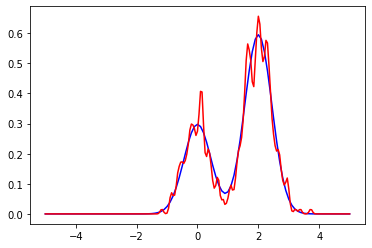

In [2]:
N = 500
h = 0.05

X = gen_data(N)

x = np.arange(xmin, xmax+0.1, 0.1)

pdf = 1/3 * multivariate_normal.pdf(x, mean=[0], cov=cov) + 2/3 * multivariate_normal.pdf(x, mean=[2], cov=cov)
plt.plot(x, pdf, 'b')

x = np.arange(xmin, xmax+h, h)

pdf_approx = parzen(X, h, xmin, xmax)
plt.plot(x, pdf_approx, 'r')

plt.show()

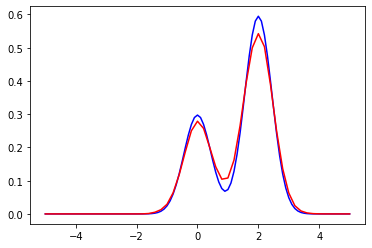

In [3]:
N = 5000
h = 0.2

X = gen_data(N)

x = np.arange(xmin, xmax+0.1, 0.1)

pdf = 1/3 * multivariate_normal.pdf(x, mean=[0], cov=cov) + 2/3 * multivariate_normal.pdf(x, mean=[2], cov=cov)
plt.plot(x, pdf, 'b')

x = np.arange(xmin, xmax+h, h)

pdf_approx = parzen(X, h, xmin, xmax)
plt.plot(x, pdf_approx, 'r')

plt.show()

b) Considere o mesmo conjunto de dados com $N=1000$. Utilize o modelo _k-nearest neighbors_ com $k = 21$ e estime a PDF. Qual o impacto da variação de $k$? Justifique.

O paramêtro $k$ tem impacto direto na suavidade da aproximação da PDF. Entretanto, para valores de $k$ muito elevados, percebe-se que o método começa a se perder.

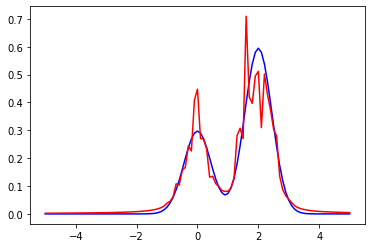

In [4]:
def knn(X, k, lower, upper, step):
    x = lower
    l = X.ndim
    n = X.shape[0]
    px = []
    while x < upper + step / 2:
        eucl = []
        for xi in X:
            eucl.append(np.sqrt(np.sum((x-xi)**2)))
        eucl = np.sort(eucl)
        ro = eucl[k]
        V = 2 * ro
        px.append(k/(n*V))
        x += step

    return px
        

N = 1000
k = 21
step = 0.1

X = gen_data(N)

x = np.arange(xmin, xmax+0.1, 0.1)

pdf = 1/3 * multivariate_normal.pdf(x, mean=[0], cov=cov) + 2/3 * multivariate_normal.pdf(x, mean=[2], cov=cov)
plt.plot(x, pdf, 'b')

x = np.arange(xmin, xmax+step, step)
pdf_approx = knn(X, k, xmin, xmax, step)
plt.plot(x, pdf_approx, 'r')

plt.show()